In [1]:
from pandas import read_csv as read
import pandas as pd
import random

import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from plot import pltPRcurve, pltROCcurve

In [2]:
def plot_corr():
    correlation_matrix = data.corr()
    plt.figure(figsize=(10,8))
    ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
    plt.title('Correlation matrix between the features', fontsize=20)
    plt.savefig("cor.png")
    plt.show()

In [3]:
def modExec():
    model.fit(X_train, y_train)
    expected = y_test
    predicted = model.predict(X_test)

    pobas = model.predict_proba(X_test)
    preds = pobas[:, 1]

    report = metrics.classification_report(expected, predicted)
    conf_matrix = metrics.confusion_matrix(expected, predicted)

    print(type(model).__name__)
    print(f"Acc: {accuracy_score(expected, predicted)}")
    print(f"Pre: {precision_score(expected, predicted)}")
    print(f"Re: {recall_score(expected, predicted)}")
    print(f"F1: {f1_score(expected, predicted)}")
    
    print(conf_matrix)

In [11]:
path = "filtData500k.csv"
data = read(path, delimiter=",")

In [12]:
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [13]:
X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

from sklearn.model_selection import train_test_split as train

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
modExec()

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
modExec()

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()

GaussianNB
Acc: 0.964697212709697
Pre: 0.595460614152203
Re: 0.20468104635153742
F1: 0.3046448087431694
[[110381    606]
 [  3466    892]]
KNeighborsClassifier
Acc: 0.9908188478044129
Pre: 0.9545329291815927
Re: 0.7948600275355667
F1: 0.8674095405033178
[[110822    165]
 [   894   3464]]
RandomForestClassifier
Acc: 0.9930122675451906
Pre: 0.9922394678492239
Re: 0.8214777420835245
F1: 0.8988199849359778
[[110959     28]
 [   778   3580]]


In [ ]:
plot_corr()

In [ ]:
data.head()

In [ ]:
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)


plot_corr()

In [18]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
plot_corr()

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

from sklearn.model_selection import train_test_split as train

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

In [24]:
from sklearn.feature_selection import RFE

# feature extraction

model = GaussianNB()

rfe = RFE(model, 5)

fit = rfe.fit(X, y)

print(fit.support_)
print(fit.ranking_)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [25]:
from sklearn.feature_selection import RFE

# feature extraction

model = KNeighborsClassifier(n_neighbors=3)

rfe = RFE(model, 5)

fit = rfe.fit(X, y)

print(fit.support_)
print(fit.ranking_)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [20]:
from sklearn.feature_selection import RFE

# feature extraction

model = RandomForestClassifier(n_estimators=110, n_jobs=-1)

rfe = RFE(model, 5)

fit = rfe.fit(X, y)

print(fit.support_)
print(fit.ranking_)

[ True False  True  True  True False False False False False False  True]
[1 2 1 1 1 7 4 5 6 8 3 1]


In [21]:
model.fit(X_train, y_train)
print(model.feature_importances_)

[8.53058831e-02 6.22283305e-02 2.43701342e-01 3.89189587e-01
 1.10765195e-01 7.97376868e-06 1.09443022e-02 9.23973924e-03
 5.05599881e-04 2.28735107e-07 1.65006485e-02 7.16111701e-02]


In [23]:
l = model.feature_importances_.tolist()
print(l)
l.sort()



[0.08530588306641887, 0.0622283304962079, 0.24370134209733088, 0.3891895872459452, 0.1107651946800349, 7.973768684740595e-06, 0.010944302165200714, 0.009239739239372593, 0.0005055998810595914, 2.287351066524885e-07, 0.016500648493218154, 0.07161117013141977]


In [ ]:
data.head()

In [26]:
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,isFraud,hour,merchant,LTR,IZoB
0,1,4,181.00,181.0,1,1,0,0,1
1,1,1,181.00,181.0,1,1,0,0,1
2,1,3,7107.77,183195.0,0,1,1,0,0
3,1,3,671.64,15123.0,0,1,1,0,0
4,1,3,1373.43,13854.0,0,1,1,0,0


In [27]:

model = GaussianNB()
modExec()


model = KNeighborsClassifier(n_neighbors=3)
modExec()


model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()

GaussianNB
Acc: 0.963544150158221
Pre: 0.5527950310559007
Re: 0.18379990821477743
F1: 0.2758739452385053
[[110339    648]
 [  3557    801]]
KNeighborsClassifier
Acc: 0.995916598031991
Pre: 0.9567567567567568
Re: 0.9341441027994493
F1: 0.94531522117729
[[110803    184]
 [   287   4071]]
RandomForestClassifier
Acc: 0.9928648836100394
Pre: 0.9750067186240258
Re: 0.8324919687930243
F1: 0.8981309568015843
[[110894     93]
 [   730   3628]]


In [ ]:
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)

data.head()

In [ ]:
data.drop('step', axis=1, inplace=True)
data.head()

In [ ]:
model = GaussianNB()
modExec()


model = KNeighborsClassifier(n_neighbors=3)
modExec()


model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()

In [ ]:
data.drop('hour', axis=1, inplace=True)
data.head()

In [ ]:
model = GaussianNB()
modExec()


model = KNeighborsClassifier(n_neighbors=3)
modExec()


model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()

In [28]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)


data.head()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

from sklearn.model_selection import train_test_split as train

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X)
# standardize the data attributes
standardized_X = preprocessing.scale(X)

model = GaussianNB()
modExec()


model = KNeighborsClassifier(n_neighbors=3)
modExec()


model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()
data.head()

GaussianNB
Acc: 0.9634661233690234
Pre: 0.547682119205298
Re: 0.18976594768242314
F1: 0.28186775732788
[[110304    683]
 [  3531    827]]
KNeighborsClassifier
Acc: 0.9967575534266765
Pre: 0.9556267154620312
Re: 0.9586966498393759
F1: 0.9571592210767469
[[110793    194]
 [   180   4178]]
RandomForestClassifier
Acc: 0.9962720534050024
Pre: 0.9856577645895154
Re: 0.9146397430013767
F1: 0.9488217091168769
[[110929     58]
 [   372   3986]]


,type,amount,oldbalanceOrg,isFraud,hour,IZoB
0,4,181.00,181.0,1,1,1
1,1,181.00,181.0,1,1,1
2,3,7107.77,183195.0,0,1,0
3,3,671.64,15123.0,0,1,0
4,3,1373.43,13854.0,0,1,0


f1=0.946 auc=0.996
f1=0.957 auc=0.971
f1=0.282 auc=0.306


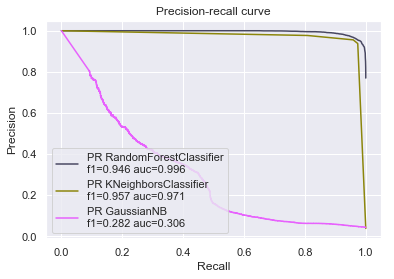

In [37]:
import random

models = []
models.append(RandomForestClassifier(n_estimators=110, n_jobs=-1))
models.append(KNeighborsClassifier(n_neighbors=3))
models.append(GaussianNB())

for model in models:
    
    model.fit(X_train, y_train)
    expected = y_test
    predicted = model.predict(X_test)
    
    pobas = model.predict_proba(X_test)
    preds = pobas[:, 1]
    
    name = type(model).__name__
    
    precision, recall, thresholds = precision_recall_curve(expected, preds)
    # calculate F1 score
    f1 = f1_score(expected, predicted)
    # calculate precision-recall AUC
    au = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(expected, preds)
    s = 'f1=%.3f auc=%.3f' % (f1, au)
    print(s)
    # plot the precision-recall curve for the model
    plt.title("Precision-recall curve")

    plt.plot(recall, precision, 'b', label=f'PR {name}\n{s}',  color=(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1)))
    plt.legend(loc = 'lower left')

    plt.xlabel('Recall')
    plt.ylabel('Precision')


plt.savefig("PR.png")